# 2.1.3  Опыт Франка-Герца
### Бутаков Иван, Гладков Андрей; Б05-871


**Цель работы**: методом электронного возбуждения измеряется энергия первого уровня атома гелия в динамическом и статическом режимах.

**Оборудование:** гелий, третрехэлектродная лампа, вольфрамовый катод, выпрямитель, потенциометрвольтметр, микроамперметр.



## Теоретическая часть

Гелий заполняет трехэлектродную лампу. Электроны, испускаемые разогретым катодом, ускоряются в постоянном электрическом поле, созданном между катодом и сетчатым электродом лампы. Двигаясь, они сталкиваются с атомами гелия. Если энергия налетающего электрона недостаточна для возбуждения или ионизации атома, то происходит упругое соударение.

При увеличении разности потенциалов энергия электронов увеличивается и становится достаточной для возбуждения атомов.

Третьм электродом лампы является коллектор. Между ним и анодом поддерживается небольшое задерживающее напряжение (потенциал коллектора меньше потенциала анода). Ток коллектора, пропорциональный числу попадающих на него за секунду электронов, измеряется микроамперметром.

При увеличении потенциала анода ток в лампе вначале растет, однако при достижении энергии возбуждения электронов коллекторный ток резко снижается. Это происходит потому, что при неупругих соударениях с атомами электроны почти полностью теряют
свою энергию и не могут преодолеть задерживающего потенциала между анодом и коллектором. При дальнейшем увеличении потенциала анода ток коллектора вновь возрастает: электроны, испытавшие неупругие соударения, при дальнейшем движении к аноду успевают набрать энергию, достаточную для преодоления задерживающего потенциала.


Следующее замедление роста тока происходит в момент, когда часть электронов неупруго сталкивается с атомами два раза: первый раз посередине пути,
второй - у анода, и т.д. Таким образом, на кривой зависимости тока коллектора от напряжения анода имеется ряд максимумов и минимумов, отстоящих друг от друга на равные расстояния V, эти расстояния равны энергии первого
возбуждённого состояния.

В работе измеряется энергия первого уровня атома гелия в динамическом и статическом режимах.

## Статический режим

In [1]:
import pandas
import numpy as np

In [2]:
# Опыты.
data_4V_st = pandas.read_csv('4V.csv', delim_whitespace=True, header = 0, comment='#', dtype = np.float64)
data_8V_st = pandas.read_csv('8V.csv', delim_whitespace=True, header = 0, comment='#', dtype = np.float64)

#Цена деления амперметра в мА
I_div = 10e-3
data_4V_st.insert(2, "I", data_4V_st["I_дел"] * I_div)
data_8V_st.insert(2, "I", data_8V_st["I_дел"] * I_div)

### Обозначения

$U$ - в вольтах, $I$ - в миллиамперах.

In [3]:
data_4V_st

,U,I_дел,I
0,0.05,0.0,0.00
1,2.10,2.0,0.02
2,4.03,4.0,0.04
3,6.08,7.0,0.07
4,8.03,10.0,0.10
...,...,...,...
56,46.22,34.0,0.34
57,47.10,34.0,0.34
58,48.07,35.0,0.35
59,49.13,36.0,0.36


In [4]:
data_8V_st

,U,I_дел,I
0,0.05,0.0,0.000
1,2.20,0.0,0.000
2,4.02,0.0,0.000
3,6.37,3.0,0.030
4,8.05,5.0,0.050
...,...,...,...
59,52.12,16.0,0.160
60,53.09,17.0,0.170
61,54.32,18.0,0.180
62,55.06,18.5,0.185


### Погрешность

In [5]:
#Для электронного вольтметра
delta_U = 0.01
delta_I = 0.5 * I_div

### График

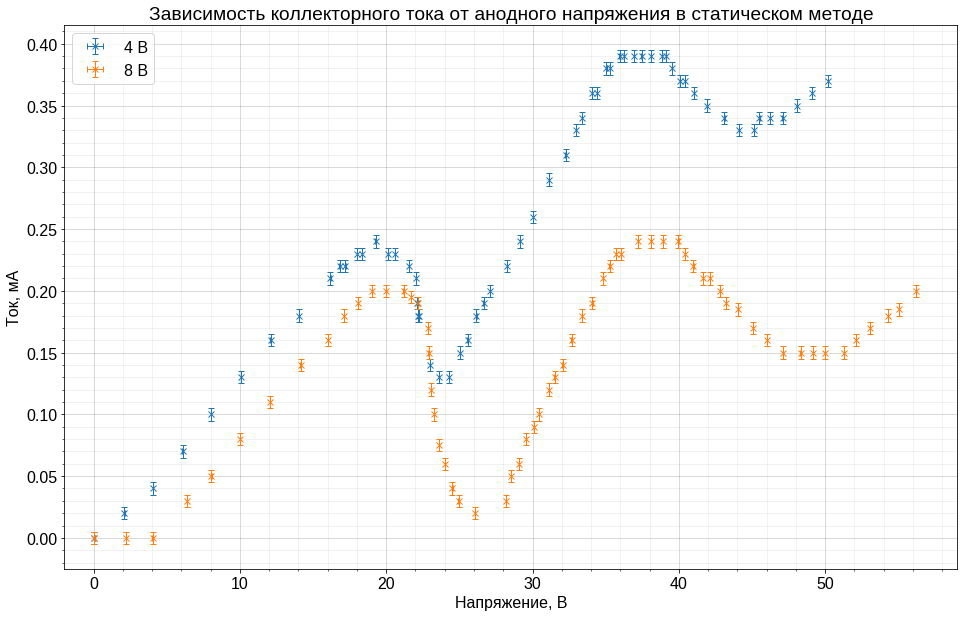

In [12]:
import matplotlib
from matplotlib import pyplot as plt

font = {'family' : 'Liberation Sans',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

fig, ax = plt.subplots()

ax.set_title("Зависимость коллекторного тока от анодного напряжения в статическом методе")

fig.set_figheight(10)
fig.set_figwidth(16)

ax.grid(color='#000000', alpha=0.15, linestyle='-', linewidth=1, which='major')
ax.grid(color='#000000', alpha=0.1, linestyle='-', linewidth=0.5, which='minor')
ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())

ax.errorbar(data_4V_st['U'], data_4V_st['I'], xerr = delta_U, yerr = delta_I,
            ls = '', lw = 1.0, marker = 'x', solid_capstyle='projecting', capsize = 3, label = '4 В')

ax.errorbar(data_8V_st['U'], data_8V_st['I'], xerr = delta_U, yerr = delta_I,
            ls = '', lw = 1.0, marker = 'x', solid_capstyle='projecting', capsize = 3, label = '8 В')

ax.set_xlim(left = -2.0)

ax.set_xlabel('Напряжение, В')
ax.set_ylabel('Ток, мА')

ax.legend(loc='upper left')
plt.show();

In [7]:
#В качестве максимума берем точку с максимальным измеренным значением тока
data_4V_st_1 = data_4V_st[data_4V_st['U'] < 24]
data_8V_st_1 = data_8V_st[data_8V_st['U'] < 24]

data_4V_st_2 = data_4V_st[np.abs(data_4V_st['I'] - 0.39) < delta_I]
data_8V_st_2 = data_8V_st[np.abs(data_8V_st['I'] - 0.24) < delta_I]

#Поскольку около второго максимума имеется плато, то мы отождествляем точки со значением тока, находящимся
#в пределах погрешности от максимума, и в качестве ответа выдаем среднее напряжение

print('Отобразим точки плато:')
print('')
print (data_4V_st_2)
print('')
print (data_8V_st_2)
print('')
plato4V = data_4V_st_2['U'].values[data_4V_st_2['U'].values.argmax()] - data_4V_st_2['U'].values[data_4V_st_2['U'].values.argmin()]
plato8V = data_8V_st_2['U'].values[data_8V_st_2['U'].values.argmax()] - data_8V_st_2['U'].values[data_8V_st_2['U'].values.argmin()]
print('Длина плато для 4 В равна %2.2f, прибавка к погрешности %2.2f В' %(plato4V, plato4V / 2))
print('Длина плато для 8 В равна %2.2f, прибавка к погрешности %2.2f В' %(plato8V, plato8V / 2))
print('')

max1V4 = data_4V_st_1['U'].values[data_4V_st_1['I'].values.argmax()]
max1V8 = data_8V_st_1['U'].values[data_8V_st_1['I'].values.argmax()]
print ('4Vmax_2 = %2.2f, 8Vmax_2 = %2.2f' % (max1V4, max1V8))

#max2V4 = data_4V_st_2['U'].values[data_4V_st_2['I'].values.argmax()]
#max2V8 = data_8V_st_2['U'].values[data_8V_st_2['I'].values.argmax()]
max2V4 = data_4V_st_2['U'].values.mean()
max2V8 = data_8V_st_2['U'].values.mean()
print ('4Vmax_2 = %2.2f, 8Vmax_2 = %2.2f' %(max2V4, max2V8))

delta4V = max2V4 - max1V4
delta8V = max2V8 - max1V8

print('')
print("Расстояние между максимумами для 4 В равно %2.2f В" %(delta4V))
print("Расстояние между максимумами для 8 В равно %2.2f В" %(delta8V))

Отобразим точки плато:

        U  I_дел     I
40  35.95   39.0  0.39
41  36.25   39.0  0.39
42  36.92   39.0  0.39
43  37.46   39.0  0.39
44  38.10   39.0  0.39
45  38.83   39.0  0.39
46  39.11   39.0  0.39

        U  I_дел     I
41  37.21   24.0  0.24
42  38.10   24.0  0.24
43  38.93   24.0  0.24
44  39.98   24.0  0.24

Длина плато для 4 В равна 3.16, прибавка к погрешности 1.58 В
Длина плато для 8 В равна 2.77, прибавка к погрешности 1.38 В

4Vmax_2 = 19.27, 8Vmax_2 = 19.01
4Vmax_2 = 37.52, 8Vmax_2 = 38.55

Расстояние между максимумами для 4 В равно 18.25 В
Расстояние между максимумами для 8 В равно 19.54 В


Поскольку в случае второго максимума имелось плато, то существует большая неопределенность в точном определении максимума. В связи с этим разумно увеличить погрешность на половину длины плато.

С учетом погрешности результат можно записать так:

$\Delta V_{4V} = 18.25 \pm 1.60$ В.

$\Delta V_{8V} = 19.54 \pm 1.40$ В.

## Динамический режим


In [8]:
data_4V_dyn = pandas.read_csv('4V.txt', delim_whitespace=True, header = 0, comment='#', dtype = np.float64)
data_8V_dyn = pandas.read_csv('8V.txt', delim_whitespace=True, header = 0, comment='#', dtype = np.float64)

data_4V_dyn.insert(2, "Comment", ['1st max', '1st min', '2nd max', '2nd min'])
data_8V_dyn.insert(2, "Comment", ['1st max', '1st min', '2nd max', '2nd min'])

$X, Y$ - абсцисса и ордината соответствующей точки в вольтах

In [9]:
#4V
data_4V_dyn

,X,Y,Comment
0,17.5,-0.002,1st max
1,22.5,0.009,1st min
2,35.0,0.005,2nd max
3,40.5,0.002,2nd min


In [10]:
#8V
data_8V_dyn

,X,Y,Comment
0,19.0,0.0050,1st max
1,25.0,-0.0030,1st min
2,34.0,0.0085,2nd max
3,42.0,0.0040,2nd min


In [11]:
delta_4V = data_4V_dyn['X'][2] - data_4V_dyn['X'][0]
print("Расстояние между 1 и 2 максимумами для задерж. напряжения 4 В равно %2.2f В" %(delta_4V))
delta_8V = data_8V_dyn['X'][2] - data_8V_dyn['X'][0]
print("Расстояние между 1 и 2 максимумами для задерж. напряжения 8 В равно %2.2f В" %(delta_8V))

Расстояние между 1 и 2 максимумами для задерж. напряжения 4 В равно 17.50 В
Расстояние между 1 и 2 максимумами для задерж. напряжения 8 В равно 15.00 В


Погрешность определялась с точностью примерно $1$ В. 
С учетом погрешности результат можно записать так:

$\Delta V_{4V} = 18 \pm 1$ В.

$\Delta V_{8V} = 15 \pm 1$ В.

## Выводы

1. Сняты зависимости коллекторного тока от напряжения в статическом методе для напряжений $4$ B, $8$ B, построен соответствующий график.
2. Статическим методом получены следующие значения энергии возбуждения атома гелия: $18.25 \pm 1.60$ эB, $19.54 \pm 1.40$ эВ.
3. Динамическим методом получены следующие значения энергии возбуждения атома гелия: $18 \pm 1$ эВ, $15 \pm 1$ эВ.
4. Более опытные экспериментары установили, что гелию для возбуждения достаточно $19.82$ эВ. Видно, что статический метод в пределах погрешности совпадает с этим значением, в то время как динамический дает пусть и не слишком драматически, но заниженные значения.

Полученные результаты демонстрируют дискретность уровней энергии в атоме гелия.